In [1]:
pip install chart-studio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [3]:
apple_data=pd.read_csv("AAPL (1).csv")
apple_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-03,123.519997,123.779999,122.209999,122.940002,121.481689,78967600
1,2020-12-04,122.599998,122.860001,121.519997,122.250000,120.799881,78260400
2,2020-12-07,122.309998,124.570000,122.250000,123.750000,122.282082,86712000
3,2020-12-08,124.370003,124.980003,123.089996,124.379997,122.904617,82225500
4,2020-12-09,124.529999,125.949997,121.000000,121.779999,120.335449,115089200
5,2020-12-10,120.500000,123.870003,120.150002,123.239998,121.778137,81312200
6,2020-12-11,122.430000,122.760002,120.550003,122.410004,120.957977,86939800
7,2020-12-14,122.599998,123.349998,121.540001,121.779999,120.335449,79184500
8,2020-12-15,124.339996,127.900002,124.129997,127.879997,126.363091,157243700
9,2020-12-16,127.410004,128.369995,126.559998,127.809998,126.293915,98208600


In [4]:
apple_data['Date']=pd.to_datetime(apple_data['Date'])

In [5]:
print(f"Dataset contains APPLE stock prices between {apple_data.Date.min()} {apple_data.Date.max()}")
print(f"Total days ={(apple_data.Date.max()-apple_data.Date.min())}")

Dataset contains APPLE stock prices between 2020-12-03 00:00:00 2022-12-02 00:00:00
Total days =729 days 00:00:00


In [6]:
apple_data.shape

(504, 7)

In [7]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       504 non-null    datetime64[ns]
 1   Open       504 non-null    float64       
 2   High       504 non-null    float64       
 3   Low        504 non-null    float64       
 4   Close      504 non-null    float64       
 5   Adj Close  504 non-null    float64       
 6   Volume     504 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.7 KB


In [8]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,147.396171,149.189842,145.691547,147.516310,146.636255,9.016616e+07
std,15.798971,16.017025,15.609578,15.832322,16.009778,2.720061e+07
min,119.029999,120.400002,116.209999,116.360001,115.151566,3.519590e+07
25%,134.704994,135.710003,133.334999,134.482498,133.085854,7.127635e+07
50%,146.875000,148.720001,145.555001,147.049996,146.316201,8.563055e+07
75%,159.575004,161.885002,156.577499,159.240002,158.598656,1.037679e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,1.954327e+08


<AxesSubplot:>

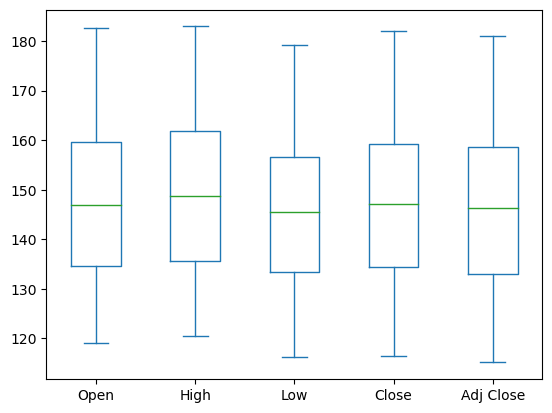

In [9]:
apple_data[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [10]:
layout = go.Layout(
        title='Stock Prices of APPLE',
            xaxis=dict(title='Date',titlefont=dict(family='Courier New, monospace',size=18,color='#7f7f7f')),

            yaxis=dict(title='Price',titlefont=dict(family='Courier New, monospace' ,size=18,color="#7f7f7f"))
)
apple = [{'x':apple_data['Date'], 'y': apple_data['Close']}]

plot = go.Figure(data=apple, layout=layout)


In [11]:
iplot(plot)

In [12]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [13]:

X=np.array(apple_data.index).reshape(-1,1)
Y=apple_data['Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [14]:
scaler=StandardScaler().fit(X_train)

In [15]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [16]:
trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='predicted'
)
apple_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=apple_data,layout=layout)

In [17]:
iplot(plot2)

# KNN

In [18]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [19]:
new_data = pd.DataFrame(index=range(0,len(apple_data)),columns=['Date', 'Close'])

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

model.fit(X_train,Y_train)
preds = model.predict(X_test)
#plt.plot(preds)

In [21]:
print(Y_test)

18     133.720001
306    164.320007
104    128.100006
4      121.779999
156    146.149994
          ...    
407    151.000000
17     134.869995
260    179.300003
202    146.830002
354    157.960007
Name: Close, Length: 152, dtype: float64


In [22]:
apple_data2 = pd.DataFrame({'Actual':Y_test, 'Predicted':preds})

In [23]:
apple_data2.head(10)

,Actual,Predicted
18,133.720001,132.017502
306,164.320007,167.200005
104,128.100006,130.397501
4,121.779999,123.202499
156,146.149994,147.517498
370,140.360001,140.450005
32,136.869995,130.737503
344,165.070007,167.687496
81,123.000000,121.162500
227,152.570007,148.940002
